### TASK: WEB SCRAPING AND SENTIMENT ANALYSIS

Extract reviews of any product from ecommerce website like amazon 

Perform emotion mining

IMPORTING LIBRARIES

In [ ]:

from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

READING DATA

In [ ]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/Apple-MacBook-Air-13-3-inch-MQD32HN/product-reviews/B073Q5R6VR/ref=cm_cr_getr_d_paging_btm_next_30?ie=UTF8&reviewerType=all_reviews'

In [ ]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [ ]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [ ]:
len(cust_name)

2282

In [ ]:
len(review_title)

2282

In [ ]:
len(review_content)

2282

In [ ]:
len(rate)

2282

In [ ]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [ ]:
!pip install -U textblob
!python -m textblob.download_corpora

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 KB 15.1 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.DataFrame()

In [ ]:
df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [ ]:
df.head(10)

,Customer Name,Review Title,Rating,Reviews
0,Amazon Customer,Excellent Service ! Charger cable could have b...,5.0 out of 5 stars,Have been using this for more than 2 years now...
1,iShahrukh,"Sleek, Lightweight, High Performance Device Me...",5.0 out of 5 stars,Macintosh has come a long way since its incept...
2,aRandomGamer,A biased review from a person who used this fo...,4.0 out of 5 stars,"Apple,apple,apple, thats the first thing that ..."
3,Frank Customer,Good overall performance,5.0 out of 5 stars,Good overall performance
4,Ravi shankar,Excellent light weight laptop.,5.0 out of 5 stars,"Using this product since four years, initially..."
5,Isha,You will not want to leave it,4.0 out of 5 stars,Purchased in July2018. After 2 years of good u...
6,J,Works well,5.0 out of 5 stars,Authentic product
7,Girish Agashe,"Typical Apple product. Classy, elegant, and (s...",5.0 out of 5 stars,I am a bit surprised by some of the negative r...
8,SwordFish,Simply Amazing! I definitely recommend this pr...,5.0 out of 5 stars,I have had my eyes on a Macbook for the longes...
9,Jai,2 YEARS LATER,4.0 out of 5 stars,its been 2 years since I bought this and never...


In [ ]:
df.to_csv(r'E:fill.csv',index = True)


In [ ]:
data = pd.read_csv("E:fill.csv",index_col=[0])

In [ ]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [ ]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [ ]:
data['Rating']

0       5.0
1       5.0
2       4.0
3       5.0
4       5.0
       ... 
2277    5.0
2278    5.0
2279    5.0
2280    5.0
2281    5.0
Name: Rating, Length: 2282, dtype: object

In [ ]:
data['Rating'].value_counts(normalize=True)*100

5.0    67.046450
1.0    14.066608
4.0    12.795793
3.0     3.242770
2.0     2.848379
Name: Rating, dtype: float64

In [ ]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
1.0,321,321,321
2.0,65,65,65
3.0,73,74,74
4.0,292,292,292
5.0,1530,1530,1529


Text(0, 0.5, 'Count')

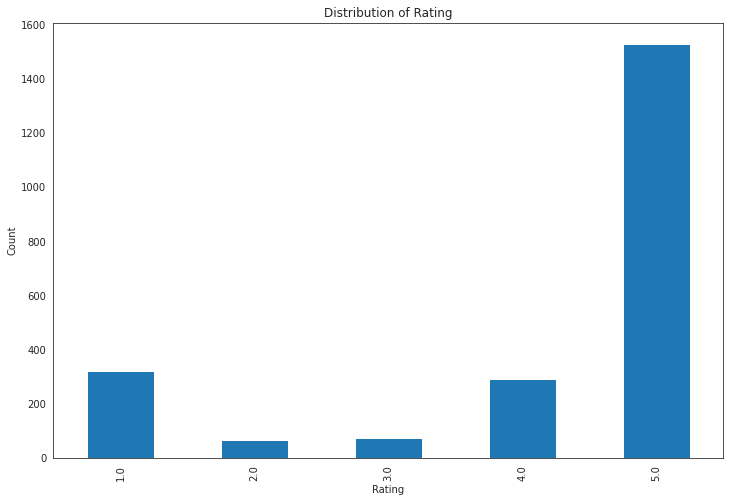

In [ ]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

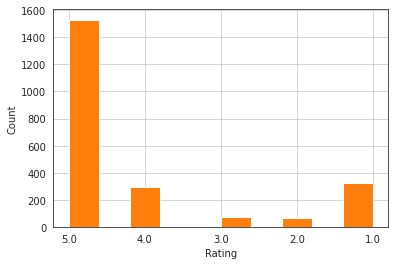

In [ ]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [ ]:
data.iloc[:,[3]]

,Reviews
0,Have been using this for more than 2 years now...
1,Macintosh has come a long way since its incept...
2,"Apple,apple,apple, thats the first thing that ..."
3,Good overall performance
4,"Using this product since four years, initially..."
...,...
2277,good
2278,👍👍👍
2279,Good value
2280,Thanks to Amazon and the seller for selling a ...


In [ ]:

Reviews=data.iloc[:,[3]]

In [ ]:
Reviews.shape

(2282, 1)

In [ ]:
Reviews.describe()

,Reviews
count,2281
unique,2099
top,Good
freq,37


In [ ]:
Reviews.dtypes

Reviews    object
dtype: object

In [ ]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Customer Name","Review Title"],axis=1,inplace=True)

data.head()

,Rating,Reviews
0,5.0,Have been using this for more than 2 years now...
1,5.0,Macintosh has come a long way since its incept...
2,4.0,"Apple,apple,apple, thats the first thing that ..."
3,5.0,Good overall performance
4,5.0,"Using this product since four years, initially..."


In [ ]:
data.Reviews.isna().sum()

1

In [ ]:
data['Reviews']=data['Reviews'].fillna(" ")

In [ ]:
data.Reviews.isna().sum()

0

In [ ]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###

data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [ ]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [ ]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

<ipython-input-34-9babcbbb57b7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews']=data['Reviews'].str.replace('[0-9]','')


In [ ]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords

In [ ]:
stop_words=stopwords.words('english')

In [ ]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [ ]:
data.head(5)

,Rating,Reviews
0,5.0,using years gave excellent service especially ...
1,5.0,macintosh come long way since inception back c...
2,4.0,appleappleapple thats first thing must flashed...
3,5.0,good overall performance
4,5.0,using product since four years initially nine ...


In [ ]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))


**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



MissingCorpusError: ignored

In [ ]:
data['Reviews'].head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

In [ ]:

Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Removing Punctuation
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [ ]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

#  Common word removal
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [ ]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

# Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [ ]:

data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()


#  Rare words removal
Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [ ]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq


In [ ]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

# 2.7 Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our reviews into a blob and then converted them into a series of words.

In [ ]:
TextBlob(data['Reviews'][0]).words

In [ ]:
TextBlob(data['Reviews'][1]).words

# Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

# Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [ ]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()


# Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

 
# N-grams
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

In [ ]:
TextBlob(data['Reviews'][0]).ngrams(2)

# Term frequency
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [ ]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

# Inverse Document Frequency
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [ ]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [ ]:
tf1

The more the value of IDF, the more unique is the word.

# Term Frequency – Inverse Document Frequency (TF-IDF)
TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [ ]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

# Bag of Words
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

# Sentiment Analysis
If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the sentiment of the first few tweets.

In [ ]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

# Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [ ]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

# Word Embeddings
Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

In [ ]:
!pip install gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'negative-words.txt'
word2vec_output_file = 'positive-words.txtpd.read_csv'


In [ ]:
#glove2word2vec(glove_input_file, word2vec_output_file)

In [ ]:

import collections
from collections import Counter
import nltk
nltk.download('punkt')

In [ ]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

In [ ]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

In [ ]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [ ]:
sent_type(data['polarity'])

In [ ]:
data["category"]=data['polarity']

In [ ]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [ ]:
data["category"]=data["category"].astype('category')
data.dtypes

In [ ]:
sns.countplot(x='category',data=data,palette='hls')

In [ ]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()